<a href="https://colab.research.google.com/github/ShashankAlluri28/INFO-5731Computational-Methods/blob/main/Alluri_Shashank_In_Class_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
with open('corpus.txt', 'r') as file:
    data = file.read().splitlines()

In [ ]:
print(data)

['Opening match in Wellington is a sellout and the challenge of welcoming their noisy neighbours is capturing the imagination', '', 'Tanya Aldred', 'Tanya Aldred', 'Wed 28 Feb 2024 07.23 EST', 'Share', '114', 'It is easy to be sucked into the narrative that Test cricket lives and breathes courtesy of England fans, whether they’re stocking up at Birmingham New Street or playing the trumpet in technicolour shirts alongside the Barmy Army in Rajkot.', '', 'But Test cricket is quite capable of slipping off its jandals and falling into a deckchair far from the strains of Jerusalem. The first Test between the New Zealand and Australia men’s sides, which starts on Thursday at the beautiful Basin Reserve, Wellington, is a sell-out, with the Hagley Oval, Christchurch, venue for the second Test, expected to follow suit.', '', 'Ollie Robinson', 'Ollie Robinson’s Test future in doubt after ‘disappointing’ return in India', 'Read more', 'It’s been a while since the Australians played a Test over th

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

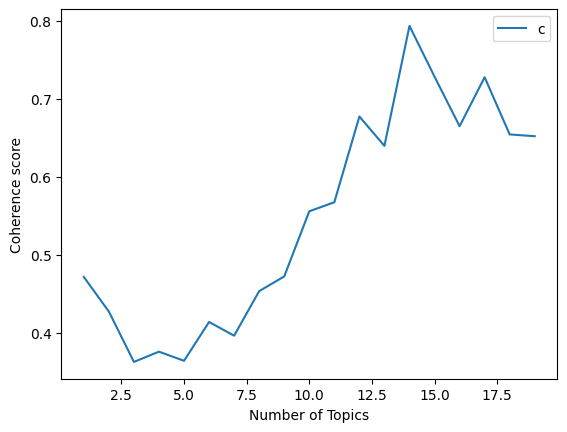

[(0,
  '0.037*"test" + 0.030*"team" + 0.030*"zealand" + 0.030*"new" + 0.022*"australia" + 0.015*"cousin" + 0.008*"rain" + 0.008*"rearguard" + 0.008*"rather" + 0.008*"hobart"'),
 (1,
  '0.030*"test" + 0.023*"cricket" + 0.023*"side" + 0.023*"new" + 0.023*"zealand" + 0.015*"period" + 0.015*"television" + 0.015*"people" + 0.015*"behind" + 0.015*"paywall"'),
 (2,
  '0.024*"reader" + 0.012*"world" + 0.012*"news" + 0.012*"guardian’s" + 0.012*"journalism" + 0.012*"people" + 0.012*"please" + 0.012*"access" + 0.012*"that’s" + 0.012*"afford"'),
 (3,
  '0.017*"they’re" + 0.017*"smith" + 0.017*"steve" + 0.017*"hated" + 0.017*"have" + 0.017*"like" + 0.017*"matthew" + 0.017*"greg" + 0.017*"warner" + 0.017*"“and"'),
 (4,
  '0.031*"wicket" + 0.031*"new" + 0.031*"zealand" + 0.021*"–" + 0.021*"sign" + 0.011*"forever" + 0.011*"kiwis’" + 0.011*"cricketing" + 0.011*"hadlee" + 0.011*"sir"'),
 (5,
  '0.028*"–" + 0.019*"gone" + 0.010*"obviously" + 0.010*"cricket" + 0.010*"see" + 0.010*"great" + 0.010*"ross" + 

In [ ]:
# Write your code here
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

# Load your data

# Preprocess the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in data]

# Create the Dictionary and Corpus
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Build LDA models with different K and calculate coherence scores
coherence_scores = []
models = []
K_values = range(1, 20)

for K in K_values:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=K, random_state=100, chunksize=100, passes=50)
    models.append(lda_model)
    coherencemodel = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherencemodel.get_coherence())

# Plot coherence score against K
plt.plot(K_values, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Choose the model with the highest coherence score
optimal_model = models[coherence_scores.index(max(coherence_scores))]

# Display the topics
optimal_model.show_topics(num_topics=optimal_model.num_topics)

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

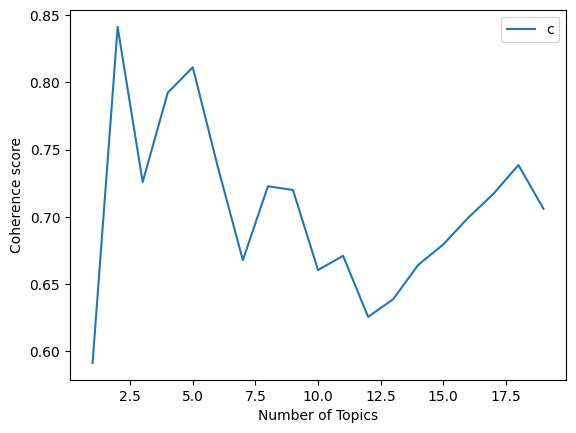

[(0,
  '-0.428*"test" + -0.409*"new" + -0.394*"zealand" + -0.242*"–" + -0.186*"australia" + -0.155*"cricket" + -0.127*"wicket" + -0.125*"side" + -0.108*"team" + -0.095*"since"'),
 (1,
  '-0.281*"test" + 0.257*"wicket" + -0.224*"since" + 0.208*"zealand" + 0.202*"new" + -0.200*"played" + -0.126*"last" + -0.121*"fiveday" + -0.121*"game" + -0.109*"white"')]

In [ ]:
# Write your code here
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LsiModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

# Load your data

# Preprocess the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in data]

# Create the Dictionary and Corpus
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Build LSA models with different K and calculate coherence scores
coherence_scores = []
models = []
K_values = range(1, 20)

for K in K_values:
    lsa_model = LsiModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=K)
    models.append(lsa_model)
    coherencemodel = CoherenceModel(model=lsa_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherencemodel.get_coherence())

# Plot coherence score against K
plt.plot(K_values, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Choose the model with the highest coherence score
optimal_model = models[coherence_scores.index(max(coherence_scores))]

# Display the topics
optimal_model.show_topics(num_topics=optimal_model.num_topics)

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

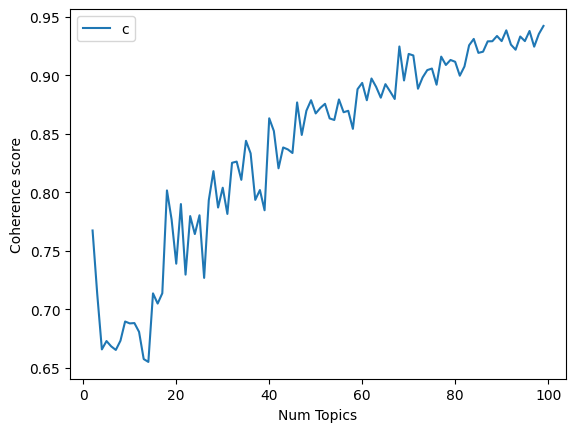

(62, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(81, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(47, '0.082*"is" + 0.082*"the" + 0.041*"their" + 0.041*"opening" + 0.041*"sellout"')
(1, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(32, '0.098*"the" + 0.049*"in" + 0.049*"team" + 0.033*"zealand" + 0.033*"cousin"')
(91, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(61, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(14, '0.071*"the" + 0.036*"have" + 0.036*"played" + 0.024*"in" + 0.024*"while"')
(18, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(73, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"hearted"')
(69, '0.062*"the" + 0.062*"and" + 0.047*"of" + 0.047*"to" + 0.031*"in"')
(15, '0.002*"if" + 0.002*"hadlee" + 0.002*"native" + 0.002*"rate" + 0.002*"he

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.ldamodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# Sample documents


# Preprocess data
processed_docs = [simple_preprocess(doc) for doc in data]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, min_count=1, vector_size=100, workers=4)  # Corrected parameter name to 'vector_size'

# Combine Word2Vec and Prepare Data for LDA
word_vectors = word2vec_model.wv
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Determine Optimal K
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    models = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        models.append(lda_model)
    return models, coherence_values

# Determine Optimal K
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    models = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)  # Increase passes to 10
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        models.append(lda_model)
    return models, coherence_values


start = 2
limit = 100
step = 1
models, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_docs, start=start, limit=limit, step=step)

# Plot coherence scores for different K values to determine optimal K
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Choose the model with the highest coherence score
optimal_model = models[coherence_values.index(max(coherence_values))]
optimal_num_topics = start + coherence_values.index(max(coherence_values))

# Summarize Topics
topics = optimal_model.print_topics(num_words=5)

# Interpret Topics
for topic in topics:
    print(topic)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
%%capture
!pip install bertopic

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(data)

2024-03-28 16:55:01,117 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-03-28 16:55:52,821 - BERTopic - Embedding - Completed ✓
2024-03-28 16:55:52,823 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-28 16:56:27,484 - BERTopic - Dimensionality - Completed ✓
2024-03-28 16:56:27,486 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-28 16:57:06,721 - BERTopic - Cluster - Completed ✓
2024-03-28 16:57:06,733 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-28 16:57:12,685 - BERTopic - Representation - Completed ✓


In [ ]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6477,-1_to_is_the_of,"[to, is, the, of, and, you, it, in, for, that]",[Accounts of Anti-Armenian Human Right Violati...
1,0,1842,0_game_team_games_he,"[game, team, games, he, players, season, hocke...",[Individual leaders by total points (Final sta...
2,1,583,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",[The following document summarizes the Clipper...
3,2,525,2_ites_cheek_yep_huh,"[ites, cheek, yep, huh, ken, why, 15, each, of, ]","[\nHuh?, \n \n ..."
4,3,496,3_israel_israeli_jews_arab,"[israel, israeli, jews, arab, jewish, arabs, p...",[From: Center for Policy Research <cpr>\nSubje...


In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('game', 0.010405367156580018),
 ('team', 0.009042206298816424),
 ('games', 0.007201056949190319),
 ('he', 0.007137719227024981),
 ('players', 0.006309667120552073),
 ('season', 0.0062526920424283115),
 ('hockey', 0.006153334660638297),
 ('play', 0.005778809680909354),
 ('25', 0.005660546781364102),
 ('year', 0.005636464361026829)]

In [ ]:
topic_model.topics_[:10]

[0, 5, -1, 4, 71, 180, -1, 0, 0, -1]

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
of all the topic models that are used we can say that lda2vec is perfoming very well as the coherence score is approximately 1 and this
topic modeling algorithm has produced the highest coherence.

so lda2vec is the better topic modeling algorithm

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

I have completed the assignment using the corpus which i have used in the exercise-3.

For the question-1 that is using LDA and i have used the k from 1 to 20 and i have got the high coherence at k = 15 and it means that words are similar and more sensible to human

For the question-2 that is using LSA and i have used the k from 1 to 20 and i have got the high coherence at k = 2.5 and i have got the less coherence at K= 12.5 with the coherence score of 0.06

For the question -3 that is using lda2vec i have used the k from 1 t0 and used the limit till 100 and i have got the highest coherence and lowest cohernce at K  85 so using that k will be optimal

For the question-4 that is using the bertopi we are able to see the chart and intertopic distiibution and probablity for the topic 142 has the highest probaility



'''